# <span style='color: green;'>The Amphibians Problem </span> 

#### We will follow the ML pipeline the building our model


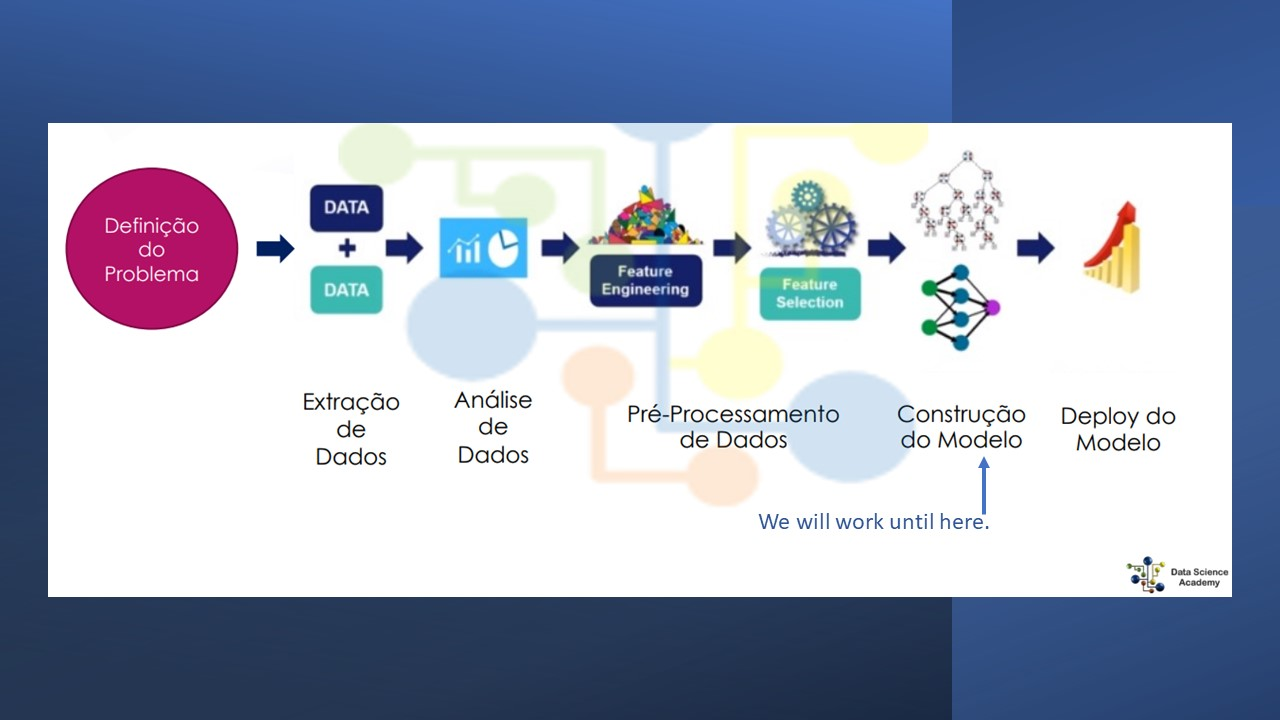

<img src="img/ml_pipeline.jpg" alt="PIPELINE" width="50"/>

# The Problem Definition

The dataset is a multilabel classification problem. The goal is to predict the presence of amphibians species near the water reservoirs based on features obtained from GIS systems and satellite images
font: https://archive.ics.uci.edu/dataset/528/amphibians

In [1]:
# importing
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import BinaryRelevance
import multiprocessing

### Importing and Exploring the data

In [2]:
# uploading data
path = "amphibians\dataset.csv"

In [3]:
df = pd.read_csv(path, sep=(";"))

In [4]:
df.head(7)

,Integer,Categorical,Numerical,Numerical.1,Categorical.1,Categorical.2,Categorical.3,Categorical.4,Categorical.5,Categorical.6,...,Ordinal.1,Categorical.8,Categorical.9,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
0,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
1,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
2,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
4,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
5,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1
6,6,A1,200,1,5,1,6,6,10,1,...,0,0,1,0,0,0,0,0,0,0


In [5]:
type_and_column = df.iloc[0:1].T
type_and_column

,0
Integer,ID
Categorical,Motorway
Numerical,SR
Numerical.1,NR
Categorical.1,TR
Categorical.2,VR
Categorical.3,SUR1
Categorical.4,SUR2
Categorical.5,SUR3
Categorical.6,UR


We can see details about the data in https://www.mdpi.com/2220-9964/8/3/123   
Each of feature has important information about the data, for exemple: The distant of buildings, trashs on the reservoirs, etc.  
The data used in the experiments was derived from GIS and satellite information, as well as from information gathered from the natural inventories that were prepared for the EIA reports for two planned road projects (Road A and Road B) in Poland [33,34,35,36,37].



<img src = "https://www.mdpi.com/ijgi/ijgi-08-00123/article_deploy/html/images/ijgi-08-00123-g002-550.jpg"  width="40%" height="5%">


### Transforming the data

We can see that the heads of the columns are the types of columns, let's fix that.

In [6]:
df_tranf_heads = pd.DataFrame(df.values[1:], columns=df.iloc[0])
df_tranf_heads

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,S52,2300,1,12,3,2,2,1,0,...,1,0,1,0,1,0,0,0,0,0
185,186,S52,300,1,14,2,7,10,2,0,...,5,0,1,1,1,1,1,0,1,0
186,187,S52,500,1,1,4,1,10,2,0,...,5,0,1,1,1,1,1,0,1,0
187,188,S52,300,1,12,3,2,1,6,0,...,0,0,1,0,1,1,0,0,0,0


In [7]:
df_tranf_heads.shape

(189, 23)

In [8]:
df_tranf_heads.columns

Index(['ID', 'Motorway', 'SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR',
       'FR', 'OR', 'RR', 'BR', 'MR', 'CR', 'Green frogs', 'Brown frogs',
       'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt',
       'Great crested newt'],
      dtype='object', name=0)

In [9]:
df_tranf_heads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    object
 1   Motorway            189 non-null    object
 2   SR                  189 non-null    object
 3   NR                  189 non-null    object
 4   TR                  189 non-null    object
 5   VR                  189 non-null    object
 6   SUR1                189 non-null    object
 7   SUR2                189 non-null    object
 8   SUR3                189 non-null    object
 9   UR                  189 non-null    object
 10  FR                  189 non-null    object
 11  OR                  189 non-null    object
 12  RR                  189 non-null    object
 13  BR                  189 non-null    object
 14  MR                  189 non-null    object
 15  CR                  189 non-null    object
 16  Green frogs         189 no

In [10]:
df_tranf_heads.isnull().any()

0
ID                    False
Motorway              False
SR                    False
NR                    False
TR                    False
VR                    False
SUR1                  False
SUR2                  False
SUR3                  False
UR                    False
FR                    False
OR                    False
RR                    False
BR                    False
MR                    False
CR                    False
Green frogs           False
Brown frogs           False
Common toad           False
Fire-bellied toad     False
Tree frog             False
Common newt           False
Great crested newt    False
dtype: bool

We can see that all the types of values are as object. What is not correct, we can see it in the data set documentation, and also in the original dataset heads.
Let's analyse and transforme it.

In [11]:
df_tranf_heads.SR

0       600
1       700
2       200
3       300
4       600
       ... 
184    2300
185     300
186     500
187     300
188     300
Name: SR, Length: 189, dtype: object

In [12]:
df_tranf_heads.SR.unique()

array(['600', '700', '200', '300', '500', '750', '7000', '1700', '8000',
       '30000', '1600', '3800', '2500', '800', '4500', '1000', '3300',
       '2100', '400', '1100', '100', '80000', '31000', '25000', '40000',
       '1900', '30', '4300', '4000', '1500', '28300', '50', '9000',
       '19300', '3500', '9100', '1300', '2000', '10050', '16000', '5000',
       '10000', '29000', '8250', '250', '500000', '50000', '450', '8300',
       '1800', '150', '900', '3000', '350', '6300', '3400', '2400',
       '115000', '360000', '4100', '2300', '15000', '2600', '26000',
       '1400', '22000'], dtype=object)

In [13]:
df_tranf_heads.NR.unique()

array(['1', '2', '3', '6', '5', '7', '4', '9', '10', '12'], dtype=object)

In [14]:
df_tranf_heads.OR.unique()

array(['50', '75', '25', '99', '100', '80'], dtype=object)

In [15]:
df_tranf_heads.RR.unique()

array(['0', '1', '2', '9', '5', '10'], dtype=object)

In [16]:
df_tranf_heads.BR.unique()

array(['0', '1', '5', '2', '9', '10'], dtype=object)

### Transforme the datatype to numerical ones

In [17]:
df_tranf_heads.SR = df_tranf_heads.SR.astype("int32")

In [18]:
df_tranf_heads.NR = df_tranf_heads.NR.astype("int8")

In [19]:
df_tranf_heads.OR = df_tranf_heads.OR.astype("int16")

In [20]:
df_tranf_heads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    object
 1   Motorway            189 non-null    object
 2   SR                  189 non-null    int32 
 3   NR                  189 non-null    int8  
 4   TR                  189 non-null    object
 5   VR                  189 non-null    object
 6   SUR1                189 non-null    object
 7   SUR2                189 non-null    object
 8   SUR3                189 non-null    object
 9   UR                  189 non-null    object
 10  FR                  189 non-null    object
 11  OR                  189 non-null    int16 
 12  RR                  189 non-null    object
 13  BR                  189 non-null    object
 14  MR                  189 non-null    object
 15  CR                  189 non-null    object
 16  Green frogs         189 no

### Analysing the Categoric types

Eventhought we can see numbers this columns have categorical information, and we have to transforme it in a numerical information, than we can work with Machine Learning.

In [21]:
categorical_col_types = type_and_column.T.filter(like="Categorical")
categorical_col_types

,Categorical,Categorical.1,Categorical.2,Categorical.3,Categorical.4,Categorical.5,Categorical.6,Categorical.7,Categorical.8,Categorical.9
0,Motorway,TR,VR,SUR1,SUR2,SUR3,UR,FR,MR,CR


In [22]:
df_tranf_heads1= pd.get_dummies(df_tranf_heads, columns=categorical_col_types.iloc[0])

In [23]:
ordinal_col_types = type_and_column.T.filter(like="Ordinal")
ordinal_col_types

,Ordinal,Ordinal.1
0,RR,BR


In [24]:
df_tranf_heads1= pd.get_dummies(df_tranf_heads1, columns=ordinal_col_types.iloc[0])

In [25]:
df_tranf_heads1

,ID,SR,NR,OR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,...,RR_10,RR_2,RR_5,RR_9,BR_0,BR_1,BR_10,BR_2,BR_5,BR_9
0,1,600,1,50,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,700,1,75,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,200,1,75,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,300,1,25,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,600,2,99,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,2300,1,75,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
185,186,300,1,100,1,1,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
186,187,500,1,100,1,1,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
187,188,300,1,100,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
#Let's that the information about the dataset after these transformations
df_tranf_heads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    object
 1   SR                  189 non-null    int32 
 2   NR                  189 non-null    int8  
 3   OR                  189 non-null    int16 
 4   Green frogs         189 non-null    object
 5   Brown frogs         189 non-null    object
 6   Common toad         189 non-null    object
 7   Fire-bellied toad   189 non-null    object
 8   Tree frog           189 non-null    object
 9   Common newt         189 non-null    object
 10  Great crested newt  189 non-null    object
 11  Motorway_A1         189 non-null    uint8 
 12  Motorway_S52        189 non-null    uint8 
 13  TR_1                189 non-null    uint8 
 14  TR_11               189 non-null    uint8 
 15  TR_12               189 non-null    uint8 
 16  TR_14               189 no

We still having some object types. Let's see it.

In [27]:
df_tranf_heads1.select_dtypes(include = "object")

,ID,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,0,0,0,0,0,0,0
1,2,0,1,1,0,0,1,0
2,3,0,1,1,0,0,1,0
3,4,0,0,1,0,0,0,0
4,5,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
184,185,0,1,0,0,0,0,0
185,186,1,1,1,1,0,1,0
186,187,1,1,1,1,0,1,0
187,188,0,1,1,0,0,0,0


In [28]:
classification_target = type_and_column.T.filter(like="Label")
classification_target

,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
0,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt


In [29]:
classification_target_list = classification_target.iloc[0].to_list()
classification_target_list

['Green frogs',
 'Brown frogs',
 'Common toad',
 'Fire-bellied toad',
 'Tree frog',
 'Common newt',
 'Great crested newt']

In [30]:
df_tranf_heads1[classification_target_list]=df_tranf_heads1[classification_target_list].astype("int8")

In [31]:
df_tranf_heads1.shape


(189, 74)

In [32]:
df_tranf_heads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    object
 1   SR                  189 non-null    int32 
 2   NR                  189 non-null    int8  
 3   OR                  189 non-null    int16 
 4   Green frogs         189 non-null    int8  
 5   Brown frogs         189 non-null    int8  
 6   Common toad         189 non-null    int8  
 7   Fire-bellied toad   189 non-null    int8  
 8   Tree frog           189 non-null    int8  
 9   Common newt         189 non-null    int8  
 10  Great crested newt  189 non-null    int8  
 11  Motorway_A1         189 non-null    uint8 
 12  Motorway_S52        189 non-null    uint8 
 13  TR_1                189 non-null    uint8 
 14  TR_11               189 non-null    uint8 
 15  TR_12               189 non-null    uint8 
 16  TR_14               189 no

In [33]:
df_tranf_heads1[classification_target_list].sum()

Green frogs           108
Brown frogs           148
Common toad           124
Fire-bellied toad      58
Tree frog              71
Common newt            58
Great crested newt     21
dtype: int64

In [34]:
df_tranf_heads1[classification_target_list].sum().values

array([108, 148, 124,  58,  71,  58,  21], dtype=int64)

In [35]:
df_tranf_heads1[classification_target_list].sum().index

Index(['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad',
       'Tree frog', 'Common newt', 'Great crested newt'],
      dtype='object')

In [36]:
amphibians_chart = df_tranf_heads1[classification_target_list].sum().to_frame().reset_index()
amphibians_chart=amphibians_chart.rename(columns={"index":"amphibian class", 0 : "Total"})
amphibians_chart

,amphibian class,Total
0,Green frogs,108
1,Brown frogs,148
2,Common toad,124
3,Fire-bellied toad,58
4,Tree frog,71
5,Common newt,58
6,Great crested newt,21


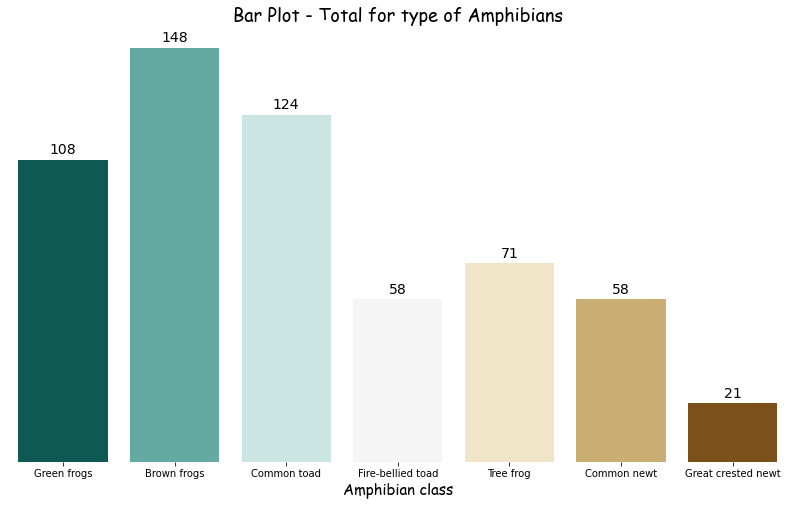

In [62]:
plt.figure(figsize=(14,8))
ax = sns.barplot(data=amphibians_chart,x = "amphibian class", y = "Total", palette = ["#01665e","#5ab4ac","#c7eae5","#f5f5f5","#f6e8c3","#d8b365","#8c510a"])
csfont = {'fontname':'Comic Sans MS'}
ax.set_title("Bar Plot - Total for type of Amphibians", fontdict = {'fontsize':18}, **csfont)
ax.set_xlabel("Amphibian class",fontdict = {'fontsize':15}, **csfont)
ax.set_ylabel("Total", fontdict={'fontsize' : 15})
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


#Annotate the bars with value
for p, v in zip(ax.patches, amphibians_chart['Total']): 
 height = p.get_height() 
 ax.text(p.get_x() + p.get_width() / 2, height + 1, v, 
 ha='center', va='bottom', fontdict = {'fontsize':14}) 
plt.show()



In [51]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

The original heads Label 1 to Label 7 are the target we are looking for

## Building the Model


In [ ]:
df_tranf_heads1 = df_tranf_heads1.drop(columns = "ID")

In [ ]:
classification_target_list

In [ ]:
feature = []
for col in df_tranf_heads1.columns:
    if col not in classification_target_list:
        feature.append(col)


In [ ]:
feature

In [ ]:
# Let's split the dataset into feature and Tarfet
df_x = df_tranf_heads1[feature]
df_y = df_tranf_heads1[classification_target_list]


In [ ]:
mlb = MultiLabelBinarizer()
mlb.fit([classification_target_list])

In [ ]:
enconded_mlb = df_y.to_numpy()
enconded_mlb

In [ ]:
mlb.fit([classification_target_list])
mlb.classes_

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df_x, enconded_mlb)

In [ ]:
multi_label_model = BinaryRelevance(RandomForestClassifier())

In [ ]:
multi_label_model.fit(train_x, train_y)

In [ ]:
from sklearn.metrics import f1_score, hamming_loss

predictions_test_y = multi_label_model.predict(test_x)
total_hamming_loss = hamming_loss(y_true = test_y, y_pred=predictions_test_y)
f1_score = f1_score(y_true = test_y, y_pred=predictions_test_y, average = "micro")
print("Total Hamming Loss of Model :", total_hamming_loss )
print("F1 Score :", f1_score)


The Hamming loss is OK and the F1 score is acetable to this execise. 

Blachnik, M., Sołtysiak, M., & Dąbrowska, D. (2019). Predicting Presence of Amphibian Species Using Features Obtained from GIS and Satellite Images. ISPRS International Journal of Geo-Information, 8(3), 123. https://doi.org/10.3390/ijgi8030123